# Predicting the Quality of Red Wine Using Machine Learning

## 1. Problem Statement

The wine industry continually strives for quality improvement, with the quality of wine being a critical factor influencing consumer preferences and market value. Quality assessment traditionally relies on sensory evaluations by human experts, which can be subjective and vary widely. The industry can benefit from a more objective, consistent, and scalable approach to quality assessment.  
  
The primary objective of this project is to develop a predictive model that accurately estimates the quality of red wine based on its physicochemical properties. This model aims to provide a more objective and reliable means of assessing wine quality, supplementing traditional sensory evaluations.

## 2. Assumptions/Hypotheses about data and model

1. Given the fact that human tasters have significant impact on quality score, therefore some tasters may having bias towards certain wines, which can result inaccuracy when implement machine learning model.  
2. Given the complexity of deep learning models, the model might be overfitting especially when the dataset only have ~1600 rows, which may not be large or diverse enough.

## 3. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/users/97liz/Desktop/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# check missing value
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


There's no missing value

In [5]:
#check duplications
print(df.duplicated().sum())

240


There are 240 dups and need to be removed

In [6]:
df = df.drop_duplicates()

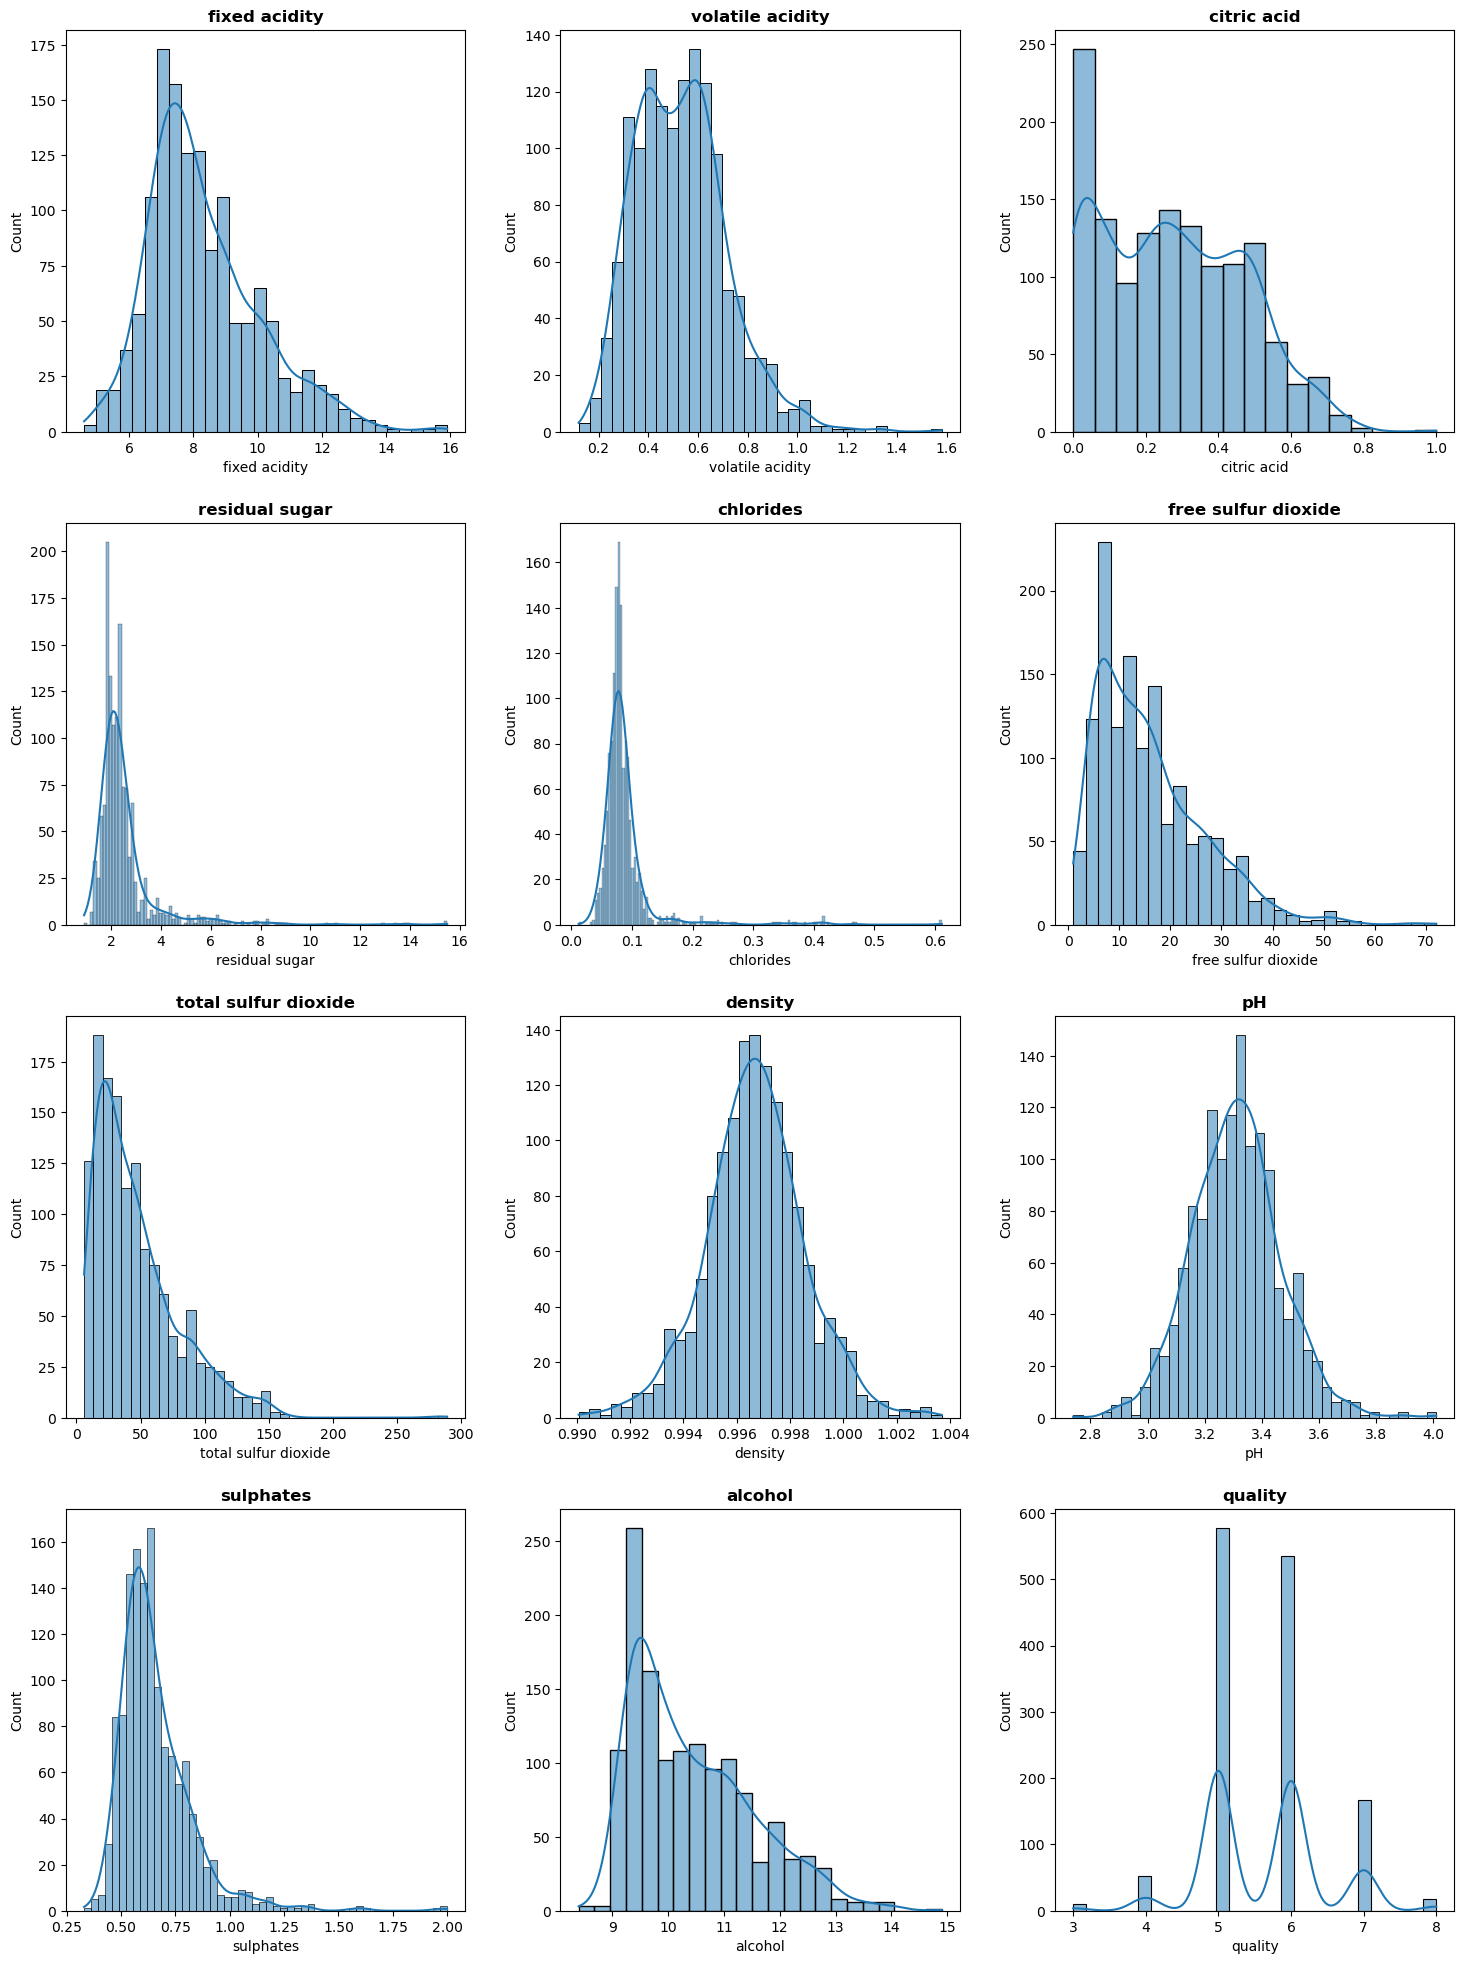

In [7]:
# distribution plot
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axs = axs.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axs[i], kde=True)
    axs[i].set_title(col, fontweight='bold')

plt.tight_layout(pad=2.0)
plt.show()

Many features like 'residual sugar', 'chlorides', 'free sulfur dioxide', and 'sulphates' show skewed distributions, indicating the presence of outliers.  
Features such as 'alcohol', 'density', and 'pH' appear to have distributions closer to normal but might still be slightly skewed.

<Axes: xlabel='quality', ylabel='count'>

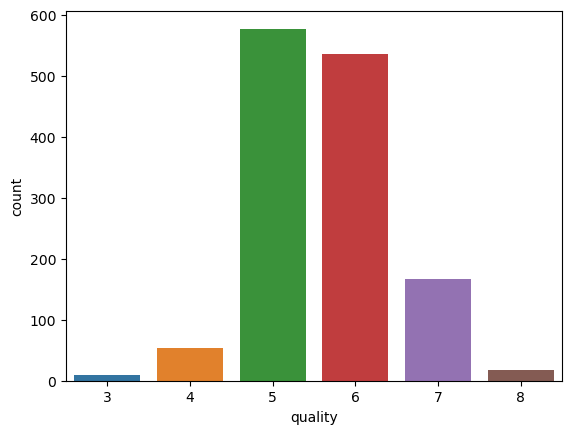

In [8]:
sns.countplot(x='quality', data=df)

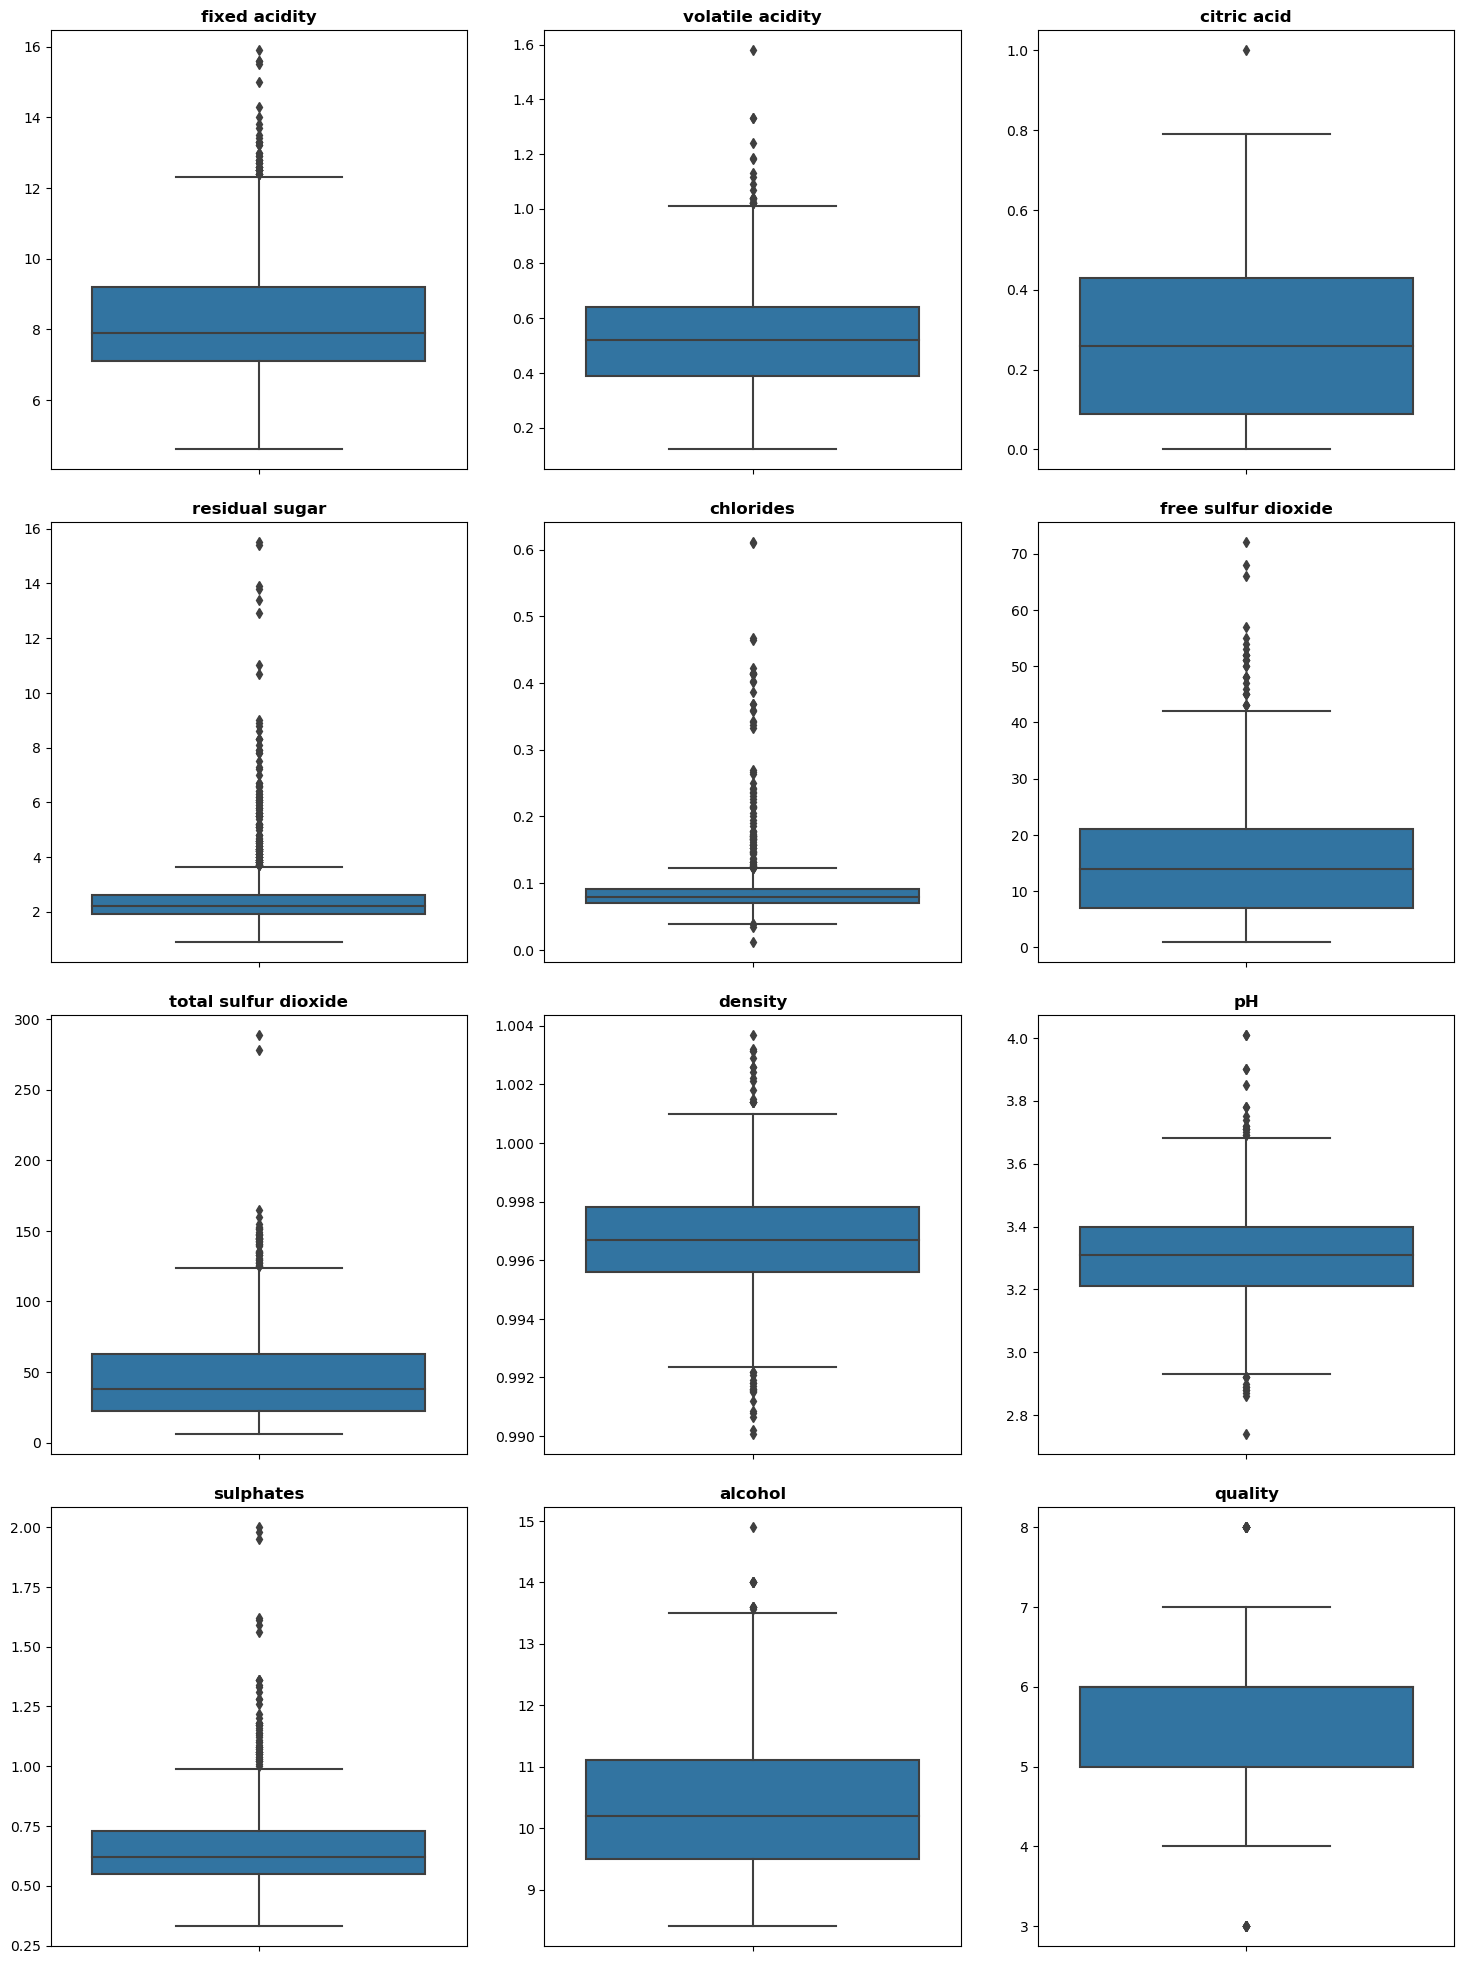

In [9]:
#box plot
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axs = axs.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axs[i])
    axs[i].set_title(col, fontweight='bold')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')

plt.tight_layout(pad=2.0)
plt.show()

There are noticeable outliers in several features, particularly in 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', and 'sulphates'.
Features like 'alcohol' and 'pH' show less variability compared to others.

## 4. Feature Engineering & Transformations

<Axes: >

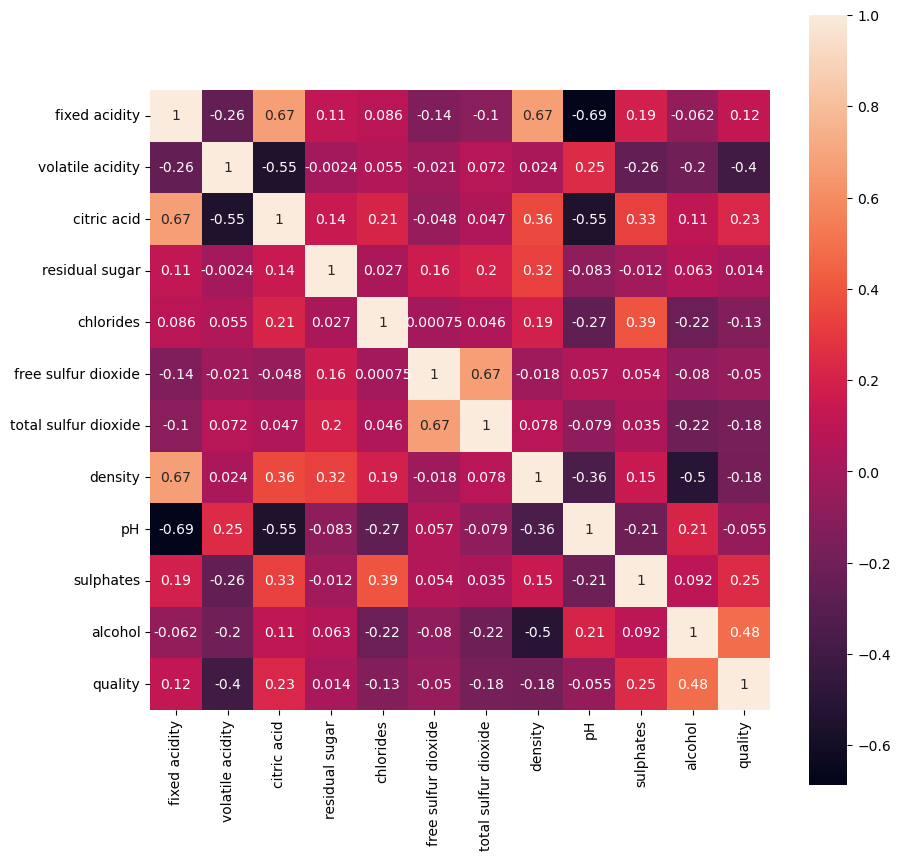

In [10]:
#showing correlation and combine columns with high correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),square = True, annot = True)

In [11]:
#combine columns with high correlation

citric_acidity = df['fixed acidity'] * df['citric acid']
density_acidity = df['fixed acidity'] * df['density']
freetotal_sulfur = df['total sulfur dioxide'] * df['free sulfur dioxide']

df['citric_acidity'] = citric_acidity
df['density_acidity'] = density_acidity
df['freetotal_sulfur'] = freetotal_sulfur

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,citric_acidity,density_acidity,freetotal_sulfur
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.000,7.38372,374.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.000,7.77504,1675.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.312,7.77660,810.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,6.272,11.17760,1020.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0.000,7.38372,520.0


## 5. Proposed Approaches (Model) with checks for overfitting/underfitting

In [13]:
from sklearn.preprocessing import MinMaxScaler, normalize, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop
from keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from keras.metrics import Accuracy

In [14]:
y=df['quality']
df.drop(['quality'], inplace=True, axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,citric_acidity,density_acidity,freetotal_sulfur
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.000,7.38372,374.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.000,7.77504,1675.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.312,7.77660,810.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.272,11.17760,1020.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0.000,7.38372,520.0


In [15]:
enc = LabelEncoder()
yenc = enc.fit_transform(y)

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(df, yenc, train_size=0.7, test_size=0.3)

In [17]:
scale = StandardScaler()

scaledtrain = scale.fit_transform(xtrain)
scaledtest = scale.transform(xtest)

In [18]:
NeuralModel = Sequential([
                          Dense(128, activation='relu', input_shape=(14,)),
                          Dense(32, activation='relu'),
                          Dense(64, activation='relu'),
                          Dense(64, activation='relu'),
                          Dense(64, activation='relu'),
                          Dense(1, activation='relu')
])

In [19]:
NeuralModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
hist = NeuralModel.fit(scaledtrain, ytrain, epochs=100, validation_data=(scaledtest,ytest))

Epoch 1/100
30/30 [==============================] - 1s 5ms/step - loss: 9.6061 - accuracy: 0.0189 - val_loss: -23.1243 - val_accuracy: 0.0441
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: -24.8195 - accuracy: 0.0368 - val_loss: -24.3689 - val_accuracy: 0.0441
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: -24.9183 - accuracy: 0.0368 - val_loss: -24.3689 - val_accuracy: 0.0441
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: -24.9183 - accuracy: 0.0368 - val_loss: -24.3689 - val_accuracy: 0.0441
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: -24.9183 - accuracy: 0.0368 - val_loss: -24.3689 - val_accuracy: 0.0441
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: -24.9183 - accuracy: 0.0368 - val_loss: -24.3689 - val_accuracy: 0.0441
Epoch 7/100
30/30 [==============================] - 0s 7ms/step - loss: -24.9183 - accuracy: 0.0368 - val_loss: -24.3689 - val_accu

30/30 [==============================] - 0s 3ms/step - loss: -24.9183 - accuracy: 0.0368 - val_loss: -24.3689 - val_accuracy: 0.0441
Epoch 58/100
30/30 [==============================] - 0s 3ms/step - loss: -24.9183 - accuracy: 0.0368 - val_loss: -24.3689 - val_accuracy: 0.0441
Epoch 59/100
30/30 [==============================] - 0s 3ms/step - loss: -24.9183 - accuracy: 0.0368 - val_loss: -24.3689 - val_accuracy: 0.0441
Epoch 60/100
30/30 [==============================] - 0s 3ms/step - loss: -24.9183 - accuracy: 0.0368 - val_loss: -24.3689 - val_accuracy: 0.0441
Epoch 61/100
30/30 [==============================] - 0s 3ms/step - loss: -24.9183 - accuracy: 0.0368 - val_loss: -24.3689 - val_accuracy: 0.0441
Epoch 62/100
30/30 [==============================] - 0s 3ms/step - loss: -24.9183 - accuracy: 0.0368 - val_loss: -24.3689 - val_accuracy: 0.0441
Epoch 63/100
30/30 [==============================] - 0s 3ms/step - loss: -24.9183 - accuracy: 0.0368 - val_loss: -24.3689 - val_accuracy

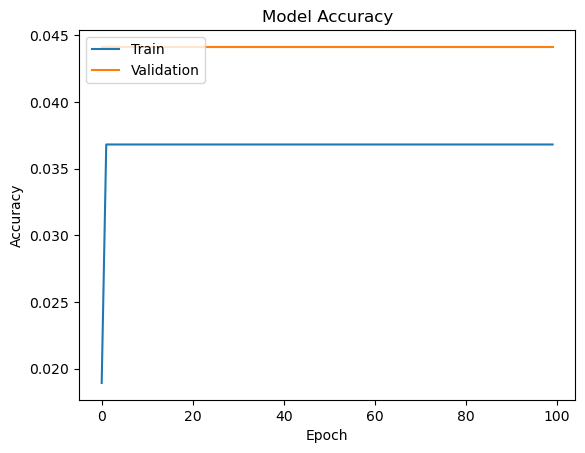

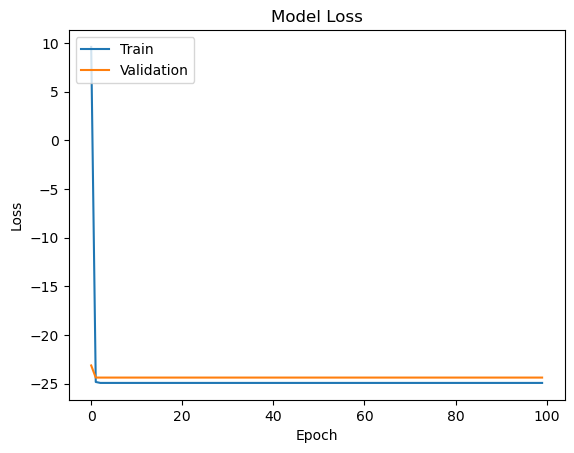

In [21]:
# Assuming 'hist' is the history object from model.fit()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

As you can see, accuracy is extremly low (0.04), I'm looking for improvments in next step

In [22]:
#change quality to binary
bins = (2, 6, 8)
gnames = ['bad', 'good']
y_new = pd.cut(y, bins = bins, labels = gnames)

In [23]:
y_new.value_counts()

bad     1175
good     184
Name: quality, dtype: int64

In [24]:
yenc2 = enc.fit_transform(y_new)

<Axes: xlabel='quality', ylabel='Count'>

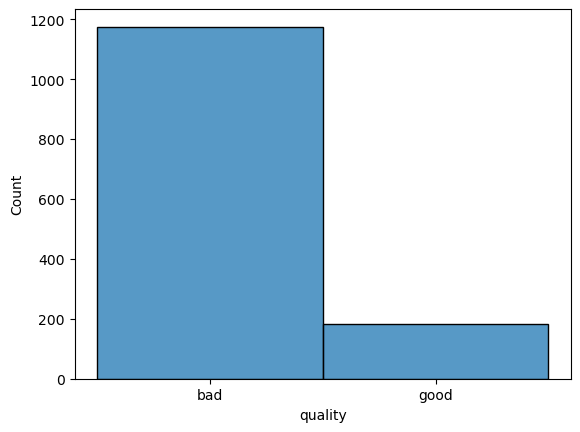

In [26]:
sns.histplot(y_new)

In [27]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(df, yenc2, train_size=0.7, test_size=0.3)

In [28]:
scaledtrain2 = scale.fit_transform(xtrain2)
scaledtest2 = scale.transform(xtest2)

In [29]:
NeuralModel = Sequential([
                          Dense(128, activation='relu', input_shape=(14,)),
                          Dense(32, activation='relu'),
                          Dense(64, activation='relu'),
                          Dense(64, activation='relu'),
                          Dense(64, activation='relu'),
                          Dense(1, activation='sigmoid')
])
NeuralModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist2 = NeuralModel.fit(scaledtrain2, ytrain2, epochs=100, validation_data=(scaledtest2,ytest2))

Epoch 1/100
30/30 [==============================] - 1s 7ms/step - loss: 0.4814 - accuracy: 0.8339 - val_loss: 0.3427 - val_accuracy: 0.8750
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.2998 - accuracy: 0.8601 - val_loss: 0.3025 - val_accuracy: 0.8750
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.8633 - val_loss: 0.2874 - val_accuracy: 0.8725
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.2590 - accuracy: 0.8885 - val_loss: 0.3001 - val_accuracy: 0.8725
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.8959 - val_loss: 0.3000 - val_accuracy: 0.8775
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.2408 - accuracy: 0.8938 - val_loss: 0.2987 - val_accuracy: 0.8750
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2287 - accuracy: 0.9085 - val_loss: 0.3053 - val_accuracy: 0.8725
Epoch 8/100
3

Epoch 59/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9832 - val_loss: 1.2512 - val_accuracy: 0.8505
Epoch 60/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0723 - accuracy: 0.9758 - val_loss: 1.1637 - val_accuracy: 0.8554
Epoch 61/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0815 - accuracy: 0.9737 - val_loss: 1.0171 - val_accuracy: 0.8407
Epoch 62/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9811 - val_loss: 0.9109 - val_accuracy: 0.8603
Epoch 63/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0695 - accuracy: 0.9853 - val_loss: 0.9251 - val_accuracy: 0.8603
Epoch 64/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9800 - val_loss: 0.8746 - val_accuracy: 0.8235
Epoch 65/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9958 - val_loss: 1.0044 - val_accuracy: 0.8505
Epoch 

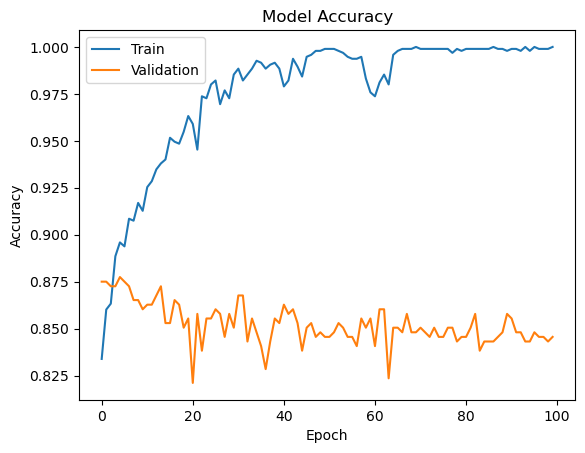

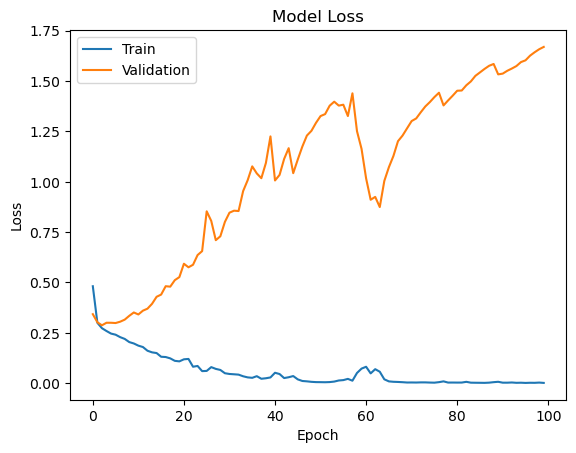

In [30]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Accuracy has been significantly improved, but there's concern of overfitting, as training loss keeps decreasing but validation loss is opposite. In the next step, I'm going to simplifying my model to prevent overfitting.

In [31]:
#dropout columns to simplify model
#after I combined columns that have high correlation, I kept the original column, now I'm going to remove them
df2 = df
df2 = df2.drop(['fixed acidity','citric acid','density','total sulfur dioxide','free sulfur dioxide'], inplace=True, axis=1)

In [32]:
df.head()

,volatile acidity,residual sugar,chlorides,pH,sulphates,alcohol,citric_acidity,density_acidity,freetotal_sulfur
0,0.70,1.9,0.076,3.51,0.56,9.4,0.000,7.38372,374.0
1,0.88,2.6,0.098,3.20,0.68,9.8,0.000,7.77504,1675.0
2,0.76,2.3,0.092,3.26,0.65,9.8,0.312,7.77660,810.0
3,0.28,1.9,0.075,3.16,0.58,9.8,6.272,11.17760,1020.0
5,0.66,1.8,0.075,3.51,0.56,9.4,0.000,7.38372,520.0


In [33]:
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(df, yenc2, train_size=0.7, test_size=0.3)

In [34]:
scaledtrain3 = scale.fit_transform(xtrain3)
scaledtest3 = scale.transform(xtest3)

In [35]:
NeuralModel = Sequential([
                          Dense(128, activation='relu', input_shape=(9,)),
                          Dense(32, activation='relu'),
                          Dense(64, activation='relu'),
                          Dense(64, activation='relu'),
                          Dense(64, activation='relu'),
                          Dense(1, activation='sigmoid')
])
NeuralModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist3 = NeuralModel.fit(scaledtrain3, ytrain3, epochs=100, validation_data=(scaledtest3,ytest2))

Epoch 1/100
30/30 [==============================] - 1s 8ms/step - loss: 0.4638 - accuracy: 0.8612 - val_loss: 0.3945 - val_accuracy: 0.8750
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 0.3068 - accuracy: 0.8612 - val_loss: 0.4470 - val_accuracy: 0.8750
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 0.2857 - accuracy: 0.8612 - val_loss: 0.4616 - val_accuracy: 0.8750
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2805 - accuracy: 0.8612 - val_loss: 0.4973 - val_accuracy: 0.8750
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.2636 - accuracy: 0.8623 - val_loss: 0.5650 - val_accuracy: 0.8676
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.2665 - accuracy: 0.8791 - val_loss: 0.5422 - val_accuracy: 0.8701
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.2540 - accuracy: 0.8843 - val_loss: 0.5351 - val_accuracy: 0.8333
Epoch 8/100
3

Epoch 59/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9968 - val_loss: 2.4808 - val_accuracy: 0.7843
Epoch 60/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9937 - val_loss: 2.6163 - val_accuracy: 0.7721
Epoch 61/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9874 - val_loss: 2.5147 - val_accuracy: 0.8064
Epoch 62/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9874 - val_loss: 2.4662 - val_accuracy: 0.7941
Epoch 63/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9884 - val_loss: 2.4984 - val_accuracy: 0.7426
Epoch 64/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9842 - val_loss: 2.3399 - val_accuracy: 0.7941
Epoch 65/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.9737 - val_loss: 2.4336 - val_accuracy: 0.7696
Epoch 

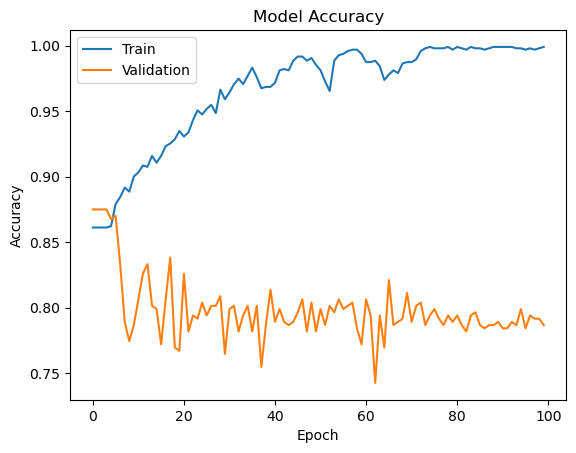

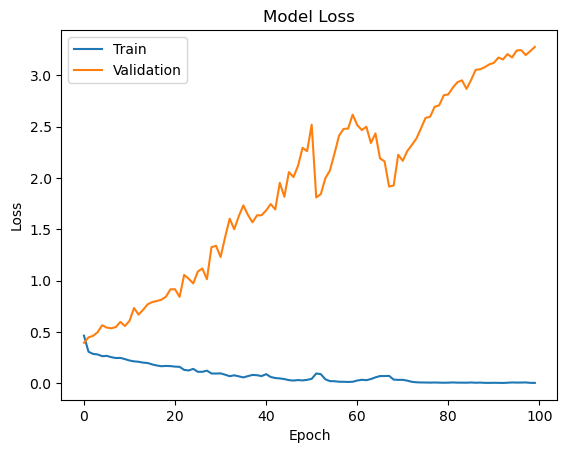

In [36]:
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Still overfitting, let's try adding regularization

## 6. Proposed Solution (Model Selection) with regularization, if needed

In [37]:
from tensorflow.keras.regularizers import l1
NeuralModel = Sequential([
                          Dense(128, activation='relu', input_shape=(9,),kernel_regularizer=l1(0.01)),
                          Dense(32, activation='relu',kernel_regularizer=l1(0.01)),
                          Dense(64, activation='relu',kernel_regularizer=l1(0.01)),
                          Dense(64, activation='relu',kernel_regularizer=l1(0.01)),
                          Dense(64, activation='relu',kernel_regularizer=l1(0.01)),
                          Dense(1, activation='sigmoid',kernel_regularizer=l1(0.01))
])
NeuralModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist4 = NeuralModel.fit(scaledtrain3, ytrain3, epochs=100, validation_data=(scaledtest3,ytest2))

Epoch 1/100
30/30 [==============================] - 1s 11ms/step - loss: 15.2372 - accuracy: 0.8538 - val_loss: 13.0170 - val_accuracy: 0.8750
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 11.1825 - accuracy: 0.8612 - val_loss: 9.2873 - val_accuracy: 0.8750
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 7.7809 - accuracy: 0.8612 - val_loss: 6.2407 - val_accuracy: 0.8750
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 5.0638 - accuracy: 0.8612 - val_loss: 3.8679 - val_accuracy: 0.8750
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 3.0145 - accuracy: 0.8612 - val_loss: 2.1565 - val_accuracy: 0.8750
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 1.6127 - accuracy: 0.8612 - val_loss: 1.0968 - val_accuracy: 0.8750
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.8577 - accuracy: 0.8612 - val_loss: 0.6488 - val_accuracy: 0.8750
Epoch 8/1

Epoch 59/100
30/30 [==============================] - 0s 4ms/step - loss: 0.4456 - accuracy: 0.8612 - val_loss: 0.4210 - val_accuracy: 0.8750
Epoch 60/100
30/30 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.8612 - val_loss: 0.4211 - val_accuracy: 0.8750
Epoch 61/100
30/30 [==============================] - 0s 4ms/step - loss: 0.4447 - accuracy: 0.8612 - val_loss: 0.4208 - val_accuracy: 0.8750
Epoch 62/100
30/30 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.8612 - val_loss: 0.4208 - val_accuracy: 0.8750
Epoch 63/100
30/30 [==============================] - 0s 3ms/step - loss: 0.4440 - accuracy: 0.8612 - val_loss: 0.4202 - val_accuracy: 0.8750
Epoch 64/100
30/30 [==============================] - 0s 4ms/step - loss: 0.4443 - accuracy: 0.8612 - val_loss: 0.4197 - val_accuracy: 0.8750
Epoch 65/100
30/30 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8612 - val_loss: 0.4196 - val_accuracy: 0.8750
Epoch 

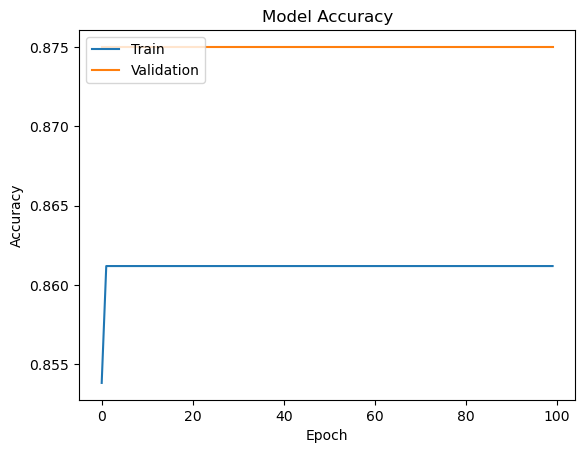

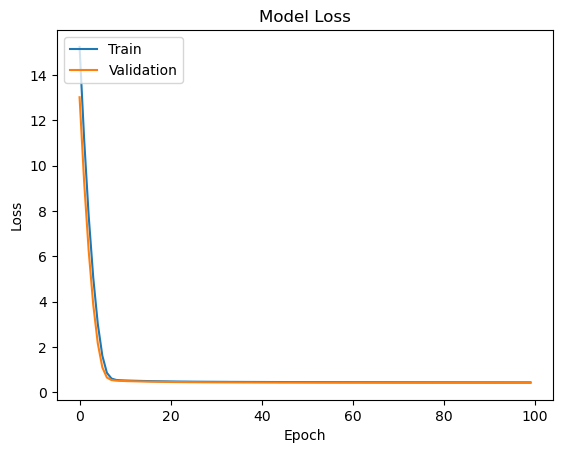

In [38]:
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Noticing that train loss and validation loss are both decreasing, and accuracy is 0.87 in train, and 0.84 accuracy in test.

## 7. Results (Accuracy) and Learnings from the methodology

In [39]:
print(f'accuracy_hist: 0.04 \n'
    f'accuracy_hist2: 0.99 \n'
    f'accuracy_hist3: 0.99 \n'
    f'accuracy_hist4: 0.85 ')

accuracy_hist: 0.04 
accuracy_hist2: 0.99 
accuracy_hist3: 0.99 
accuracy_hist4: 0.85 


Due to the extremely low accuracy of Model 1, I converted the target variable into a binary format. This modification substantially improved the accuracy in Models 2 and 3. Nonetheless, both models experienced issues with overfitting, which I successfully addressed by implementing regularization techniques.

During the whole process, I learned the importance of feature transformation and selection in enhancing model accuracy. Additionally, it demonstrated how applying regularization can effectively mitigate the problem of overfitting in predictive models.

## 8. Future Work

The final version of my model achieves an 85% accuracy rate in identifying good and bad red wine. There is potential for further enhancement, for instance, by integrating convolution layers or incorporating dropout layers to prevent overfitting. The relatively small size of the dataset, consisting of only 1600 entries, makes the model more susceptible to overfitting. Therefore, expanding the dataset with additional data could lead to more robust and accurate predictions.